In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("adult.data")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [5]:
cols = ["age", "workclass", "fnlwgt", "education", "education-num", "martial-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-counrty", "income"]

In [6]:
df.columns = cols

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-counrty,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
import seaborn as sns

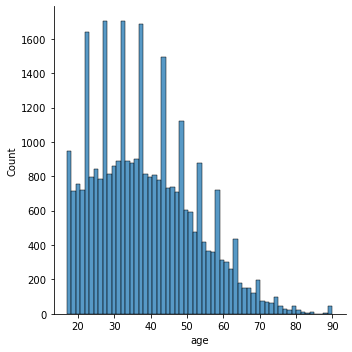

In [9]:
sns.displot(x = "age", data = df)

<AxesSubplot:xlabel='age'>

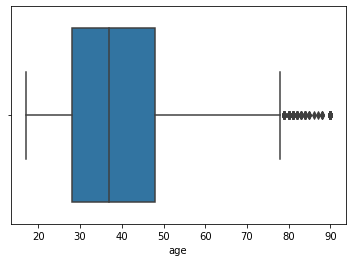

In [10]:
sns.boxplot(x = "age", data = df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   martial-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-counrty  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
import numpy as np

In [14]:
df.replace("?", np.NaN, inplace = True)

In [15]:
df["workclass"].value_counts().index

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='workclass'>

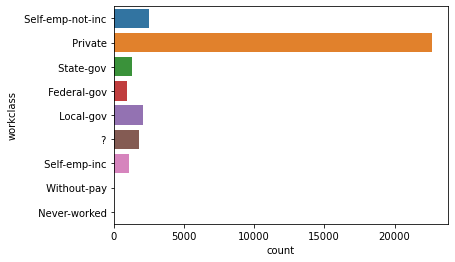

In [16]:
sns.countplot(y = df["workclass"])

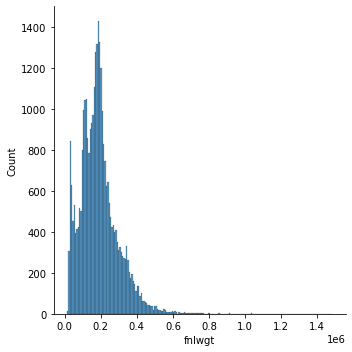

In [17]:
sns.displot(x = "fnlwgt", data = df)

<AxesSubplot:xlabel='fnlwgt'>

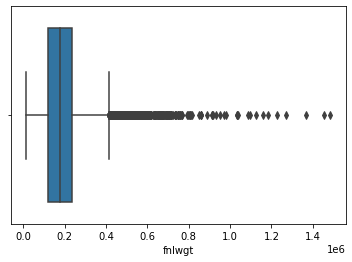

In [18]:
sns.boxplot(x = "fnlwgt", data = df)

In [19]:
df.size

488400

<AxesSubplot:xlabel='count', ylabel='education'>

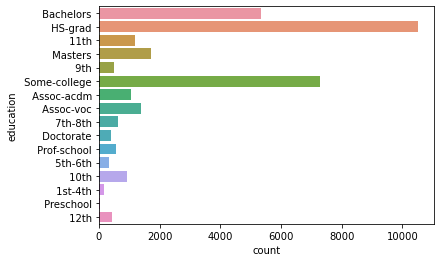

In [20]:
sns.countplot(y = "education", data = df)

### 2. Bivariate Analysis

#### (i) Chi-square test (for categorical attributes)

In [21]:
from scipy.stats import chi2_contingency
from pandas.api.types import is_string_dtype

significance_level = 0.05

for column in df:
    if is_string_dtype(df[column]):
        info = pd.crosstab(df["income"], df[column])
        stat, p, dof, _= chi2_contingency(info.values)
        if p <= significance_level: 
            print(f"{column} is Significant!") 
        else: 
            print(f"{column} is Not significant!") 

workclass is Significant!
education is Significant!
martial-status is Significant!
occupation is Significant!
relationship is Significant!
race is Significant!
sex is Significant!
native-counrty is Significant!
income is Significant!


#### (ii) Correlation (for numerical features)

<AxesSubplot:>

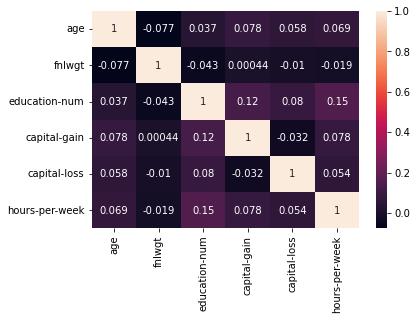

In [22]:
corr = df.corr()

sns.heatmap(corr, annot = True)     #annot = True to show values

Text(0.5, 1.0, 'Principal Component Analysis for Feature Selection')

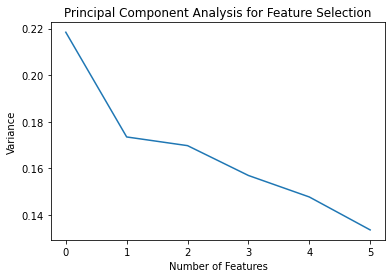

In [23]:
from pandas.api.types import is_int64_dtype
import matplotlib.pyplot as plt

int_cols = []
for column in df:
    if is_int64_dtype(df[column]):
        int_cols.append(column)
        
from sklearn.preprocessing import StandardScaler
x = df.loc[:, int_cols].values
# Separating out the target
y = df.loc[:,'income'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA()

pca = pca.fit(x)
values = pca.explained_variance_ratio_

sns.lineplot(x = range(len(values)), y = values)
plt.xlabel("Number of Features")
plt.ylabel("Variance")
plt.title("Principal Component Analysis for Feature Selection")